# Dimensionality reduction

## The curse of dimensionality

# Main Approaches for dimensionality reduction

In [144]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [145]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# PCA

In [146]:
print(X)

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]
 [ 1.11816122  0.32508721  0.31710572]
 [-1.02258878 -0.64384064 -0.13368695]
 [ 0.67351984 -0.27342519 -0.00787835]
 [ 1.01619558  0.51546608  0.46783297]
 [ 0.54957723  0.67728016  0.2340159 ]
 [-0.98960443  0.00886617 -0.12152034]
 [ 1.13248106  0.28229967  0.06972972]
 [-0.99337712 -0.26832824 -0.15761101]
 [-0.94763679 -0.4995849  -0.13927911]
 [ 1.10095709  0.1706481   0.09790432]
 [-0.34604591  0.45334414  0.06433843]
 [ 0.69102621 -0.27337761 -0.05926516]
 [ 0.68302902  0.70421846  0.24642318]
 [ 0.8774031  -0.16775101 -0.02162333]
 [-1.06090127 -0.48213721 -0.38573526]
 [ 0.52336644  0.66585845  0.39019099]
 [-0.94419403 -0.61502157 -0.47610118]
 [-0.9716288   0.00742468 -0.18764369]
 [-1.10560661 -0.31903307 -0.17189644]
 [ 1.1748694   0.15718214  0.26579776]
 [ 0.91337123 -0.1608149 

In [147]:
X_centered = X - X.mean(axis=0)

In [148]:
X.mean(axis=0)

array([0.02406745, 0.20932515, 0.07155422])

In [149]:
U, s, Vt = np.linalg.svd(X_centered)

In [150]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [151]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [152]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

In [153]:
W2 = Vt.T[:, :2]
X2D = X_centerd.dot(W2)

In [154]:
X2D

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [156]:
X2D

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264],
       [ 1.04466138, -0.11244353],
       [-1.05932502,  0.31189109],
       [ 1.13761426,  0.14576655],
       [ 1.16044117,  0.36481599],
       [-1.00167625,  0.39422008],
       [ 0.2750406 , -0.34391089],
       [-0.45624787,  0.69707573],
       [-0.79706574, -0.26870969],
       [-0.66924929,  0.65520024],
       [ 1.30679728,  0.37671343],
       [-0.6626586 , -0.32706423],
       [ 1.25387588,  0.56043928],
       [ 1.04046987, -0.08727672],
       [ 1.26047729,  0.1571074 ],
       [-1.09786649,  0.38643428],
       [-0.7130973 ,  0.64941523],
       [ 0.17786909, -0.43609071],
       [-1.02975735,  0.33747452],
       [ 0.94552283,

In [157]:
print(pca.components_.T[:, 0])

[-0.93636116 -0.29854881 -0.18465208]


In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [159]:
X2D

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264],
       [ 1.04466138, -0.11244353],
       [-1.05932502,  0.31189109],
       [ 1.13761426,  0.14576655],
       [ 1.16044117,  0.36481599],
       [-1.00167625,  0.39422008],
       [ 0.2750406 , -0.34391089],
       [-0.45624787,  0.69707573],
       [-0.79706574, -0.26870969],
       [-0.66924929,  0.65520024],
       [ 1.30679728,  0.37671343],
       [-0.6626586 , -0.32706423],
       [ 1.25387588,  0.56043928],
       [ 1.04046987, -0.08727672],
       [ 1.26047729,  0.1571074 ],
       [-1.09786649,  0.38643428],
       [-0.7130973 ,  0.64941523],
       [ 0.17786909, -0.43609071],
       [-1.02975735,  0.33747452],
       [ 0.94552283,

In [160]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [161]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [162]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [163]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95) +1


In [164]:
pca = PCA(n_components=0.95)
pca.fit_transform(X)
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [165]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)




pca = PCA(n_components=154)


In [166]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [167]:
mnist.target = mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [168]:
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

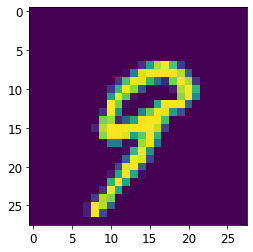

In [169]:
plt.imshow(X_train[0].reshape(28,28))
plt.show()

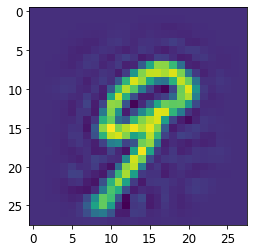

In [170]:
plt.imshow(X_recovered[0].reshape(28,28))

# Randomized PCA

In [171]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)
X_recovered = rnd_pca.inverse_transform(X_reduced)

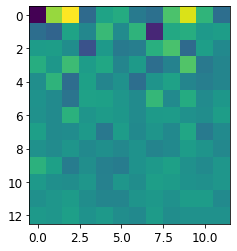

In [172]:
plt.imshow(np.concatenate((X_reduced[0], np.array([0,0])), axis=0).reshape(13,12))

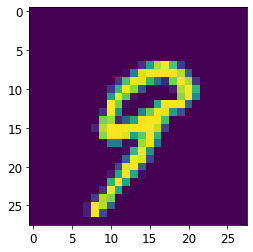

In [173]:
plt.imshow(X_train[0].reshape(28,28))
plt.show()

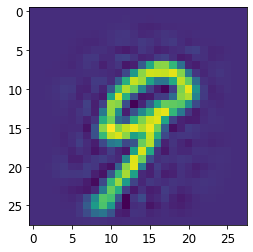

In [174]:
plt.imshow(X_recovered[0].reshape(28,28))

In [175]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

# Kernel PCA

In [176]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [177]:
print(X_reduced)

[[-0.33461647  0.91891079]
 [-0.65464618  0.27384865]
 [ 0.18057351 -0.35307274]
 ...
 [-0.38925593 -0.76039345]
 [-1.24621802  0.39482819]
 [ 0.25610506  1.01096733]]


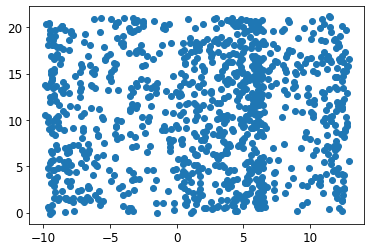

In [178]:
plt.scatter(X[:, 0],X[:, 1])
plt.show()

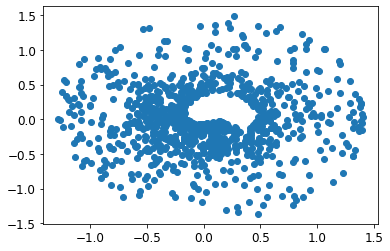

In [179]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

# Tuning the hypermeters in Kernel PCA

In [180]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = Pipeline([("kpca", KernelPCA(n_components=2)), ("log_reg", LogisticRegression())])
param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10), 
              "kpca__kernel": ["rbf", "sigmoid"]}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, t)

/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(

/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(

/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(

/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(

/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(

/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(

/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "/home/nbp/python/my_env/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(

ValueError: Unknown label type: 'continuous'

# LLE

In [183]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


In [184]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors = 20)
X_reduced = lle.fit_transform(X)

In [185]:
print(X_reduced)

[[ 0.01737585  0.04073576]
 [ 0.00232259 -0.00063447]
 [-0.05763555 -0.0537782 ]
 ...
 [-0.01053525  0.05154995]
 [ 0.07678202 -0.00479529]
 [ 0.02398699  0.03185912]]


In [186]:
print(X)

[[-3.29677117  4.26198454  7.69787682]
 [ 5.95972743 11.45784273 12.72625276]
 [ 6.66051523 18.15820401 -9.84713337]
 ...
 [ 6.18364276  1.44095323 -1.71242696]
 [ 5.86076169  1.09185823 12.47091112]
 [-8.16213703  5.61235668  4.51171684]]


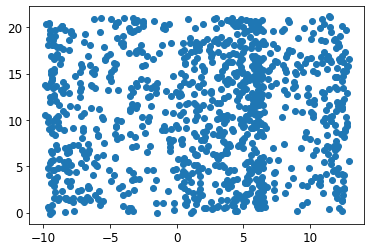

In [187]:
plt.scatter(X[:,0], X[:,1])

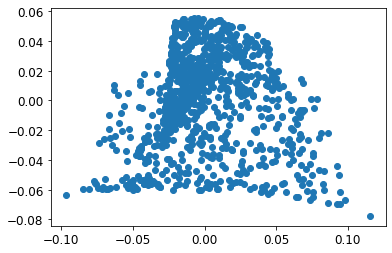

In [188]:
plt.scatter(X_reduced[:,0], X_reduced[:,1])

# Exercise 8

In [189]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]
y = mnist["target"]

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=10000)


In [190]:
import time
from sklearn.metrics import accuracy_score
then = time.time()
classifier = RandomForestClassifier(max_depth=6, n_jobs=-1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
score1 = accuracy_score(y_test, y_pred)

diff1 = time.time()-then
print("Score: ", score1)
print("Time: ", diff1)

Score:  0.8943
Time:  4.127132415771484


In [191]:
print(len(X_train))

60000


In [192]:
from sklearn.decomposition import PCA

then = time.time()

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
then = time.time()
classifier = RandomForestClassifier(max_depth=6, n_jobs=-1)
classifier.fit(X_reduced, y_train)

y_pred = classifier.predict(X_test_reduced)

diff2 = time.time() - then
score2 = accuracy_score(y_test, y_pred)
print("Score: ", score2)
print("Time: ", diff2)

Score:  0.8543
Time:  8.366580724716187


In [193]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [194]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

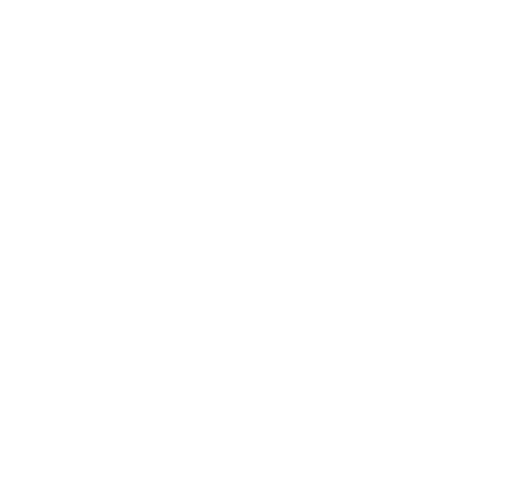

In [195]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [196]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 2 is required.

In [ ]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()